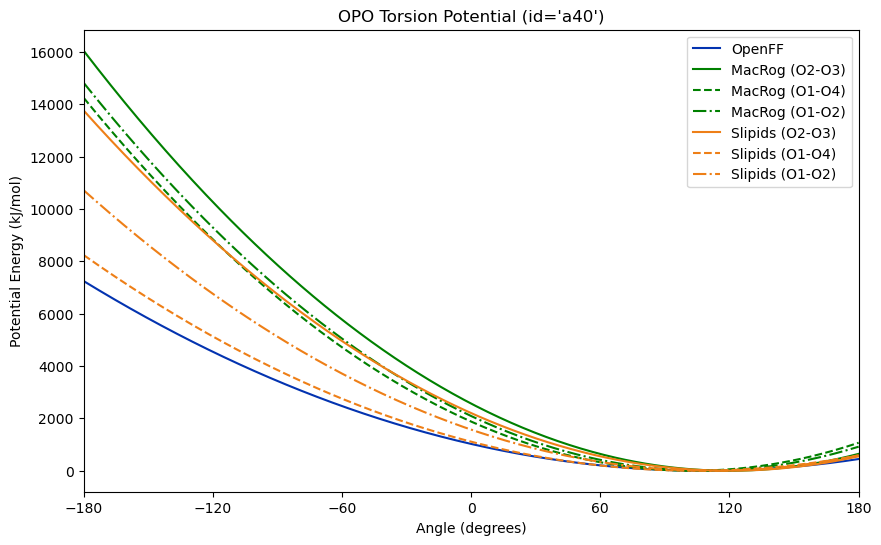

In [154]:
import math
import numpy as np
import matplotlib.pyplot as plt

# https://docs.openforcefield.org/projects/toolkit/en/0.7.0/smirnoff.html#angles
# OPO angle

# OpenFF
equilibrium_angle_deg_openff = 108.377258330900  # degrees
force_constant_openff = 572.171715317454  # kJ/mol/rad²

# M1 (adjacent (O2P))
equilibrium_angle_deg_M1 = 119.9  # degrees
force_constant_M1 = 1171.52  # kJ/mol/rad²
# M2 (across (OSP))
equilibrium_angle_deg_M2 = 102.6  # degrees
force_constant_M2 = 376.56  # kJ/mol/rad²
# M3 (both)
equilibrium_angle_deg_M3 = 108.23  # degrees
force_constant_M3 = 836.8  # kJ/mol/rad²

# range of angles around the equilibrium angle
# angle_range = np.linspace(90, 135, 400)  # degrees/fig focus
angle_range = np.linspace(-180, 180, 400)  # degrees/fig focus

def calculate_angle_potential(current_angle, equilibrium_angle_deg, force_constant):
    equilibrium_angle_rad = math.radians(equilibrium_angle_deg)
    current_angle_rad = math.radians(current_angle)
    potential_energy = 0.5 * force_constant * (current_angle_rad - equilibrium_angle_rad)**2
    return potential_energy

potential_energies_openff = [calculate_angle_potential(angle, equilibrium_angle_deg_openff, force_constant_openff) for angle in angle_range]
potential_energies_M1 = [calculate_angle_potential(angle, equilibrium_angle_deg_M1, force_constant_M1) for angle in angle_range]
potential_energies_M2 = [calculate_angle_potential(angle, equilibrium_angle_deg_M2, force_constant_M1) for angle in angle_range]
potential_energies_M3 = [calculate_angle_potential(angle, equilibrium_angle_deg_M3, force_constant_M1) for angle in angle_range]

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Slipids (Urey-Bradley)
equilibrium_angle_S1 = 120.0  # degrees
force_constant_S1_angle = 1004.16  # kJ/mol/rad^2
distance_equilibrium_S1 = 0  # nm
force_constant_S1_distance = 0  # kJ/mol/nm^2

equilibrium_angle_S2 = 104.3  # degrees
force_constant_S2_angle = 669.44  # kJ/mol/rad^2
distance_equilibrium_S2 = 0  # nm
force_constant_S2_distance = 0  # kJ/mol/nm^2

equilibrium_angle_S3 = 111.6  # degrees
force_constant_S3_angle = 827.5952  # kJ/mol/rad^2
distance_equilibrium_S3 = 0  # nm
force_constant_S3_distance = 0  # kJ/mol/nm^2

# O2L	PL	O2L	5	120.0	1004.16	0.0	0.0
# OSLP	PL	OSLP	5	104.3	669.44		0.0	0.0	
# OSLP	PL	O2L	5	111.6	827.5952	0.0	0.0	

def calculate_urey_bradley_potential(current_angle, equilibrium_angle_deg, force_constant_angle, distance_equilibrium, force_constant_distance):
    equilibrium_angle_rad = math.radians(equilibrium_angle_deg)
    current_angle_rad = math.radians(current_angle)
    radius = (distance_equilibrium/2) / np.sin(equilibrium_angle_rad/2)
    potential_energy = ((force_constant_angle / 2) * (current_angle_rad - equilibrium_angle_rad)**2) + \
                       ((force_constant_distance / 2) * (2 * np.sin(current_angle_rad/2) * (radius) - distance_equilibrium)**2)
    return potential_energy
    
potential_energies_S1 = [calculate_urey_bradley_potential(angle, equilibrium_angle_S1, force_constant_S1_angle, distance_equilibrium_S1, force_constant_S1_distance) for angle in angle_range]
potential_energies_S2 = [calculate_urey_bradley_potential(angle, equilibrium_angle_S2, force_constant_S2_angle, distance_equilibrium_S2, force_constant_S2_distance) for angle in angle_range]
potential_energies_S3 = [calculate_urey_bradley_potential(angle, equilibrium_angle_S3, force_constant_S3_angle, distance_equilibrium_S3, force_constant_S3_distance) for angle in angle_range]

plt.figure(figsize=(10, 6))
plt.plot(angle_range, potential_energies_openff, color='#0333b0', label='OpenFF')
plt.plot(angle_range, potential_energies_M1, color='green', label='MacRog (O2-O3)')
plt.plot(angle_range, potential_energies_M2, color='green', label='MacRog (O1-O4)', linestyle="dashed")
plt.plot(angle_range, potential_energies_M3, color='green', label='MacRog (O1-O2)', linestyle="dashdot") #(O1-O2)
plt.plot(angle_range, potential_energies_S1, color='#ee7f17', label='Slipids (O2-O3)')
plt.plot(angle_range, potential_energies_S2, color='#ee7f17', label='Slipids (O1-O4)', linestyle="dashed")
plt.plot(angle_range, potential_energies_S3, color='#ee7f17', label='Slipids (O1-O2)', linestyle="dashdot") #(O1-O2)
# plt.axvline(x=equilibrium_angle_deg_openff, color='#0333b0', linestyle=':', label='OpenFF equilibrium angle')
# plt.axvline(x=equilibrium_angle_deg_M3, color='green', linestyle=':', label='MacRog equilibrium angle')
# plt.axvline(x=equilibrium_angle_S3, color='#ee7f17', linestyle=':', label='Slipids equilibrium angle')
plt.title("OPO Torsion Potential (id='a40')")
plt.xlabel('Angle (degrees)')
plt.ylabel('Potential Energy (kJ/mol)')
plt.xlim(-180, 180)
plt.xticks([-180, -120, -60, 0, 60, 120, 180])
# plt.ylim(0,20)
plt.legend()
plt.show()


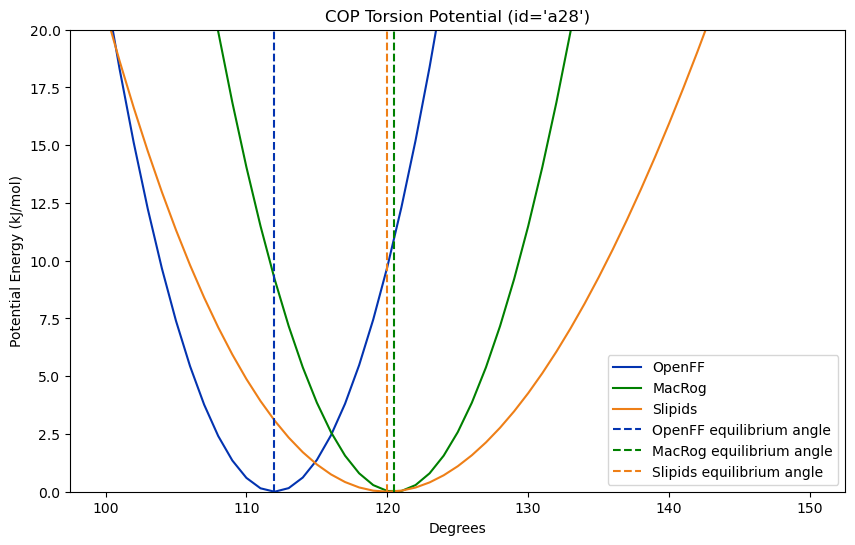

In [147]:
import math
import numpy as np
import matplotlib.pyplot as plt

# OpenFF
equilibrium_angle_deg_openff = 111.987451607100  # degrees
force_constant_openff = 995.169500024040  # kJ/mol/rad²

# MacRog
equilibrium_angle_deg_macrog = 120.5  # degrees
force_constant_macrog = 836.8  # kJ/mol/rad²

# range of angles around the equilibrium angle
# angle_range = np.linspace(-180, 180, 400)  # degrees/fig focus
angle_range = np.linspace(100, 150, 51)  # degrees/fig focus

def calculate_angle_potential(current_angle, equilibrium_angle_deg, force_constant):
    equilibrium_angle_rad = math.radians(equilibrium_angle_deg)
    current_angle_rad = math.radians(current_angle)
    potential_energy = 0.5 * force_constant * (current_angle_rad - equilibrium_angle_rad)**2
    return potential_energy

potential_energies_openff = [calculate_angle_potential(angle, equilibrium_angle_deg_openff, force_constant_openff) for angle in angle_range]
potential_energies_macrog = [calculate_angle_potential(angle, equilibrium_angle_deg_macrog, force_constant_macrog) for angle in angle_range]

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Slipids (Urey-Bradley)
equilibrium_angle_slipids = 120.0  # in degrees
force_constant_slipids_angle = 167.36  # in kJ/mol/rad^2
distance_equilibrium = 0.233  # nm
force_constant_distance = 29288.0  # in kJ/mol/nm^2
# CTL2	OSLP	PL	5	120.0	167.36		0.233	29288.0	

def calculate_urey_bradley_potential(current_angle, equilibrium_angle_deg, force_constant_angle, distance_equilibrium, force_constant_distance):
    equilibrium_angle_rad = math.radians(equilibrium_angle_deg)
    current_angle_rad = math.radians(current_angle)
    radius = (distance_equilibrium/2) / np.sin(equilibrium_angle_rad/2)
    potential_energy = ((force_constant_angle / 2) * (current_angle_rad - equilibrium_angle_rad)**2) + \
                       ((force_constant_distance / 2) * (2 * np.sin(current_angle_rad/2) * (radius) - distance_equilibrium)**2)
    # Bug-fix
                    #    ((force_constant_distance / 2) * (2 * np.sin(current_angle_rad/2) * (.1345) - distance_equilibrium)**2)
    # if current_angle < 125 and current_angle > 115:
    #     x = 2 * np.sin(current_angle_rad/2) * (radius)
    #     y = distance_equilibrium
    #     distance_energy = ((force_constant_distance / 2) * (2 * np.sin(current_angle_rad/2) * (radius) - distance_equilibrium)**2)
    #     print(f"------------------------------")
    #     print(f"distance_energy = {distance_energy}, radius = {radius} angle = {current_angle}, x = {x}, y={y}")
    #     print(f"------------------------------")

    return potential_energy
    
potential_energies_slipids = [calculate_urey_bradley_potential(angle, equilibrium_angle_slipids, force_constant_slipids_angle, distance_equilibrium, force_constant_distance) for angle in angle_range]

plt.figure(figsize=(10, 6))
plt.plot(angle_range, potential_energies_openff, color='#0333b0', label='OpenFF')
plt.plot(angle_range, potential_energies_macrog, color='green', label='MacRog')
plt.plot(angle_range, potential_energies_slipids, color='#ee7f17', label='Slipids')
plt.axvline(x=equilibrium_angle_deg_openff, color='#0333b0', linestyle='--', label='OpenFF equilibrium angle')
plt.axvline(x=equilibrium_angle_deg_macrog, color='green', linestyle='--', label='MacRog equilibrium angle')
plt.axvline(x=equilibrium_angle_slipids, color='#ee7f17', linestyle='--', label='Slipids equilibrium angle')
plt.title("COP Torsion Potential (id='a28')")
plt.xlabel('Degrees')
plt.ylabel('Potential Energy (kJ/mol)')
# plt.xlim(-180, 180)
# plt.xticks([-180, -120, -60, 0, 60, 120, 180])
plt.ylim(0,20)
plt.legend()
plt.show()
